# Data Fetching and pre-processing

In [ ]:
!pip install kaggle

In [ ]:
!pip install h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
import torch
from torch.utils.data import DataLoader, Dataset, ConcatDataset, random_split
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Instantiate the Kaggle API client
api = KaggleApi()

# Log in to Kaggle using your credentials
api.authenticate()

# Download the dataset
api.dataset_download_files('jessicali9530/celeba-dataset', path='/content', unzip=True)


In [ ]:
import os
import pandas as pd
from PIL import Image

# Setup directory paths
input_image_dir = '/content/img_align_celeba/img_align_celeba'  # Adjust to where your images are stored
bbox_file_path = '/content/list_bbox_celeba.csv'  # Adjust to where your bounding boxes are stored
output_train_dir = '/content/train'  # Directory for training images
output_test_dir = '/content/test'  # Directory for testing images

# Ensure output directories exist
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_test_dir, exist_ok=True)

# Read bounding box data
bbox_df = pd.read_csv(bbox_file_path)  # Adjust if the format is different
# bbox_df.head()

In [ ]:
import shutil
shutil.rmtree('/content/ImageNet-Datasets-Downloader')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(bbox_df, test_size=500, train_size=2000, random_state=42, shuffle=False)

In [ ]:
import os
import shutil
import random

# Define the base directory for the 'imagenet_mini' dataset
base_dir = '/content/imagenet-mini'

# Define source directories
train_src_dir = os.path.join(base_dir, 'train')
val_src_dir = os.path.join(base_dir, 'val')

# Define target directories
train_tgt_dir = '/content/train_0'
test_tgt_dir = '/content/test_0'

# Create target directories if they do not exist
os.makedirs(train_tgt_dir, exist_ok=True)
os.makedirs(test_tgt_dir, exist_ok=True)

def select_and_copy_files(src_dir, tgt_dir, num_files):
    # List all files in the source directory
    all_files = []
    for class_folder in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_folder)
        if os.path.isdir(class_path):
            all_files.extend([os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.JPEG')])

    # Select a random subset of files
    selected_files = random.sample(all_files, num_files)

    # Copy the selected files to the target directory
    for file_path in selected_files:
        # Define the target path
        tgt_path = os.path.join(tgt_dir, os.path.basename(file_path))
        # Copy file
        shutil.copy(file_path, tgt_path)

# Now, use this function to populate 'train_0' and 'test_0'
select_and_copy_files(train_src_dir, train_tgt_dir, 2000)
select_and_copy_files(val_src_dir, test_tgt_dir, 500)

print(f"Files in {train_tgt_dir}: {len(os.listdir(train_tgt_dir))}")
print(f"Files in {test_tgt_dir}: {len(os.listdir(test_tgt_dir))}")

In [ ]:
def resize_images(folder_path, target_size=(128, 128)):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                # Full path to the current file
                file_path = os.path.join(root, file)
                # Open the image file
                img = Image.open(file_path)
                # Resize the image
                img = img.resize(target_size, Image.ANTIALIAS)
                # Save the image back to its location
                img.save(file_path)
                # Optionally, print out the file path to show progress
                print(f"Resized {file_path}")


In [ ]:
folder_path = '/content/train_0'  # Adjust this path to your folder
resize_images(folder_path)


In [ ]:
folder_path = '/content/test_0'  # Adjust this path to your folder
resize_images(folder_path)


In [ ]:
folder_path = '/content/train'  # Adjust this path to your folder
resize_images(folder_path)

In [ ]:
folder_path = '/content/test'  # Adjust this path to your folder
resize_images(folder_path)

<ipython-input-91-f4610a868377>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Resized /content/test/002305.jpg
Resized /content/test/002147.jpg
Resized /content/test/002139.jpg
Resized /content/test/002390.jpg
Resized /content/test/002361.jpg
Resized /content/test/002396.jpg
Resized /content/test/002378.jpg
Resized /content/test/002307.jpg
Resized /content/test/002004.jpg
Resized /content/test/002316.jpg
Resized /content/test/002050.jpg
Resized /content/test/002006.jpg
Resized /content/test/002129.jpg
Resized /content/test/002230.jpg
Resized /content/test/002287.jpg
Resized /content/test/002205.jpg
Resized /content/test/002170.jpg
Resized /content/test/002301.jpg
Resized /content/test/002260.jpg
Resized /content/test/002442.jpg
Resized /content/test/002243.jpg
Resized /content/test/002101.jpg
Resized /content/test/002058.jpg
Resized /content/test/002423.jpg
Resized /content/test/002110.jpg
Resized /content/test/002191.jpg
Resized /content/test/002436.jpg
Resized /content/test/002329.jpg
Resized /content/test/002499.jpg
Resized /content/test/002248.jpg
Resized /c

In [ ]:
import zipfile
import os

# Specify the folder path you want to download
folder_paths = ['/content/train', '/content/test', '/content/train_0', '/content/test_0']
# Specify the output zip file name
zip_paths = ['/content/train.zip', '/content/test.zip', '/content/train_0.zip', '/content/test_0.zip']
for i in range(len(folder_paths)):
  folder_path = folder_paths[i]
  zip_path = zip_paths[i]
  # Create a ZipFile object
  with zipfile.ZipFile(zip_path, 'w') as zipf:
      for root, dirs, files in os.walk(folder_path):
          for file in files:
              # Create a complete file path
              file_path = os.path.join(root, file)
              # Add file to the zip file
              zipf.write(file_path, os.path.relpath(file_path, os.path.join(folder_path, '..')))

  print(f"Created zip file {zip_path}")


Created zip file /content/train.zip
Created zip file /content/test.zip
Created zip file /content/train_0.zip
Created zip file /content/test_0.zip


In [ ]:
import h5py
import os
from PIL import Image
import numpy as np
def create_hdf5_dataset(image_dirs, labels, output_file):
    with h5py.File(output_file, 'w') as h5f:
        for dir_path, label in zip(image_dirs, labels):
            group = h5f.create_group(str(label))
            image_files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
            if not image_files:
                print(f"No images found in {dir_path}.")
            for i, img_path in enumerate(image_files):
                with Image.open(img_path) as img:
                    img_array = np.array(img)
                group.create_dataset(f'image_{i}', data=img_array, compression="gzip", compression_opts=9)
                print(f"Processed {img_path} into dataset under label {label}.")


# Example usage
create_hdf5_dataset(
    ['/content/train', '/content/train_0'],
    [1, 0],
    '/content/drive/MyDrive/cv_project/train_dataset.hdf5'
)

create_hdf5_dataset(
    ['/content/test', '/content/test_0'],
    [1, 0],
    '/content/drive/MyDrive/cv_project/test_dataset.hdf5'
)


Processed /content/train/000779.jpg into dataset under label 1.
Processed /content/train/001529.jpg into dataset under label 1.
Processed /content/train/000536.jpg into dataset under label 1.
Processed /content/train/000547.jpg into dataset under label 1.
Processed /content/train/000294.jpg into dataset under label 1.
Processed /content/train/001154.jpg into dataset under label 1.
Processed /content/train/000550.jpg into dataset under label 1.
Processed /content/train/001970.jpg into dataset under label 1.
Processed /content/train/000296.jpg into dataset under label 1.
Processed /content/train/000402.jpg into dataset under label 1.
Processed /content/train/001203.jpg into dataset under label 1.
Processed /content/train/000438.jpg into dataset under label 1.
Processed /content/train/001706.jpg into dataset under label 1.
Processed /content/train/001534.jpg into dataset under label 1.
Processed /content/train/000204.jpg into dataset under label 1.
Processed /content/train/001251.jpg into

Label: 0
Number of images: 2000


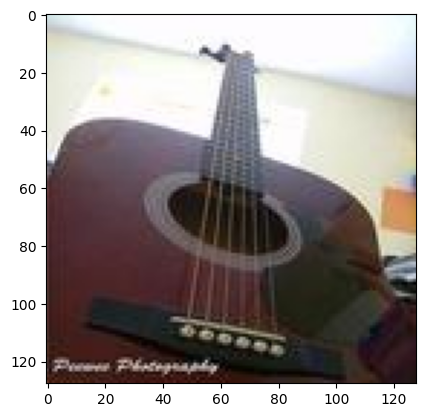

In [ ]:
def load_data_from_hdf5(hdf5_file):
    with h5py.File(hdf5_file, 'r') as h5f:
        for label in h5f.keys():
            group = h5f[label]
            images = [group[key][:] for key in group.keys()]
            labels = [label] * len(images)
            yield images, labels

# Example usage
for images, labels in load_data_from_hdf5('/content/drive/MyDrive/cv_project/train_dataset.hdf5'):
    print('Label:', labels[0])
    print('Number of images:', len(images))
    # Display the first image
    plt.imshow(images[0])
    plt.show()
    break
